# Analyzing the Bookmaker Overround - Python

Import the standard libraries used throughout the notebook: NumPy, Pandas, Matplotlib, Seaborn, csv, and statistics.

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd
import statistics

Set the experiment parameters: number of simulated events, outcome probabilities, bet sizes, and the different odds strategies to compare.

In [10]:
# Parameters
n_events = 5000
probs = [0.8, 0.2] # Probabilities for two outcomes
bets = [50, 50] # Units wagered on each outcome
odds_fair = [1.25, 5] # Fair odds calculated as 1/0.8=1.25 and 1/0.2=5
odds_misspricing = [1.31, 5.25] # Misspriced odds higher than fair odds
odds_overrounding = [1.19, 4.75] # Odds lower than fair odds (overrounding applied)

Define the core functions used in the simulation: the per-event profit calculator, the Monte Carlo runner, averaging helper, and a function to convert results into DataFrames for analysis.

In [11]:
# Main functions

# Profit Calculation Function
def calculate_profit(odds, bets, n_events=n_events, probs=probs):
    outcomes = np.random.choice([0, 1], size=n_events, p=probs)
    profit = []
    for i in range(1, len(outcomes)):
        if outcomes[i] == 0:
            event_profit = -((odds[0]-1) * bets[0]) + bets[1]
        elif outcomes[i] == 1:
            event_profit = -((odds[1]-1) * bets[1]) + bets[0]
        profit.append(event_profit)
    cum_profit = np.cumsum(profit).tolist()
    return cum_profit

# Monte Carlo simulation
def monte_carlo_simulation(odds, bets, n_simulations=1000):
    return np.array([calculate_profit(odds, bets) for _ in range(n_simulations)])

# Average the Monte Carlo results
def average_monte_carlo(odds, bets, n_simulations=1000):
    results = monte_carlo_simulation(odds, bets, n_simulations)
    return results.mean(axis=0)

# Run Monte Carlo and store results in DataFrames (one DataFrame per strategy)
def mc_to_df(odds, bets, n_simulations=1000):
    results = monte_carlo_simulation(odds, bets, n_simulations)
    df = pd.DataFrame(results.T,
                      index=range(1, results.shape[1] + 1),
                      columns=[f"sim_{i+1}" for i in range(results.shape[0])])
    return df

Runs the Monte Carlo simulations for each odds strategy and stores the results in DataFrames for later plotting and analysis.

In [12]:
# Create DataFrames (available for later analysis)
df_fair = mc_to_df(odds_fair, bets)
df_misspricing = mc_to_df(odds_misspricing, bets)
df_overrounding = mc_to_df(odds_overrounding, bets)

Set the plotting style and visualizes individual Monte Carlo runs as faint lines and their average cumulative profit per strategy as bold lines.

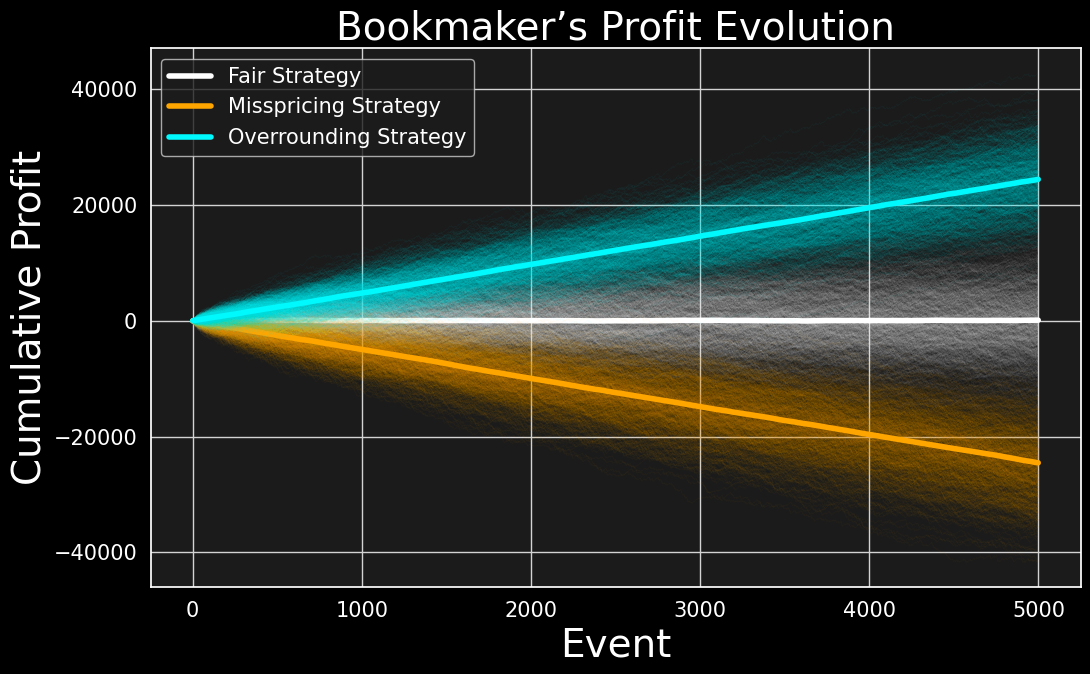

In [13]:
# Plot settings
sns.set_theme(style="darkgrid", rc={"axes.labelcolor": "white",
                                    "text.color": "white",
                                    "xtick.color": "white",
                                    "ytick.color": "white",
                                    "axes.facecolor": "#1B1B1B",
                                    "figure.facecolor": "black",
                                    "grid.color": "lightgrey",
                                    "xtick.labelsize": 15,
                                    "ytick.labelsize": 15,
                                    "legend.fontsize": 15 })
plt.figure(figsize=(12, 7))

# Plot individual simulations from DataFrames and their averages
for col in df_fair.columns:
    plt.plot(df_fair.index, df_fair[col], color='white', alpha=0.03, linewidth=0.5)
plt.plot(df_fair.index, df_fair.mean(axis=1), color='white', label='Fair Strategy', linewidth=4)

for col in df_misspricing.columns:
    plt.plot(df_misspricing.index, df_misspricing[col], color='orange', alpha=0.03, linewidth=0.5)
plt.plot(df_misspricing.index, df_misspricing.mean(axis=1), color='orange', label='Misspricing Strategy', linewidth=4)

for col in df_overrounding.columns:
    plt.plot(df_overrounding.index, df_overrounding[col], color='#00F9FD', alpha=0.03, linewidth=0.5)
plt.plot(df_overrounding.index, df_overrounding.mean(axis=1), color='#00F9FD', label='Overrounding Strategy', linewidth=4)

plt.title("Bookmaker’s Profit Evolution", fontsize=28)
plt.xlabel("Event", fontsize=28)
plt.ylabel("Cumulative Profit", fontsize=28)
plt.legend(loc='upper left', ncol=1)
plt.show()

Plot the distributions of final cumulative profit (across simulations) for the three strategies.

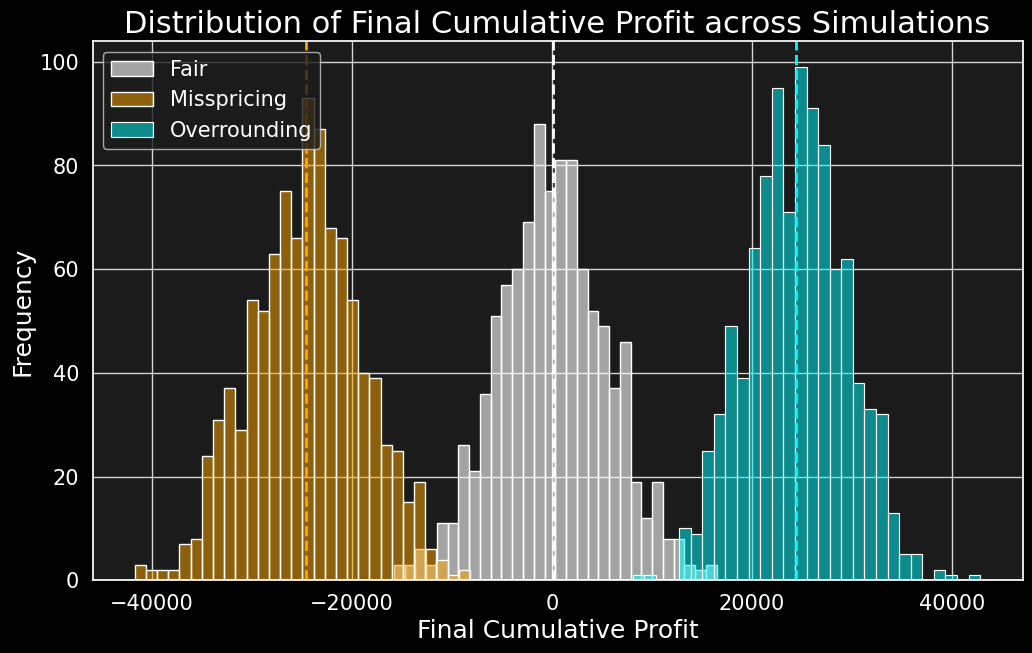

In [14]:
# Plot distributions of final cumulative profit across simulations
sns.set_theme(style="darkgrid", rc={"axes.labelcolor": "white",
                                    "text.color": "white",
                                    "xtick.color": "white",
                                    "ytick.color": "white",
                                    "axes.facecolor": "#1B1B1B",
                                    "figure.facecolor": "black",
                                    "grid.color": "lightgrey",
                                    "xtick.labelsize": 15,
                                    "ytick.labelsize": 15,
                                    "legend.fontsize": 15 })
plt.figure(figsize=(12, 7))

# Extract final cumulative profit for each simulation (last event)
final_fair = df_fair.iloc[-1].values
final_mis = df_misspricing.iloc[-1].values
final_ovr = df_overrounding.iloc[-1].values

# Plot histograms (counts) with matching colors
sns.histplot(final_fair, color='white', alpha=0.6, kde=False, stat='count', bins=30, label='Fair')
sns.histplot(final_mis, color='orange', alpha=0.5, kde=False, stat='count', bins=30, label='Misspricing')
sns.histplot(final_ovr, color='#00F9FD', alpha=0.5, kde=False, stat='count', bins=30, label='Overrounding')

# Add mean lines for clarity
plt.axvline(final_fair.mean(), color='white', linestyle='--', linewidth=2)
plt.axvline(final_mis.mean(), color='orange', linestyle='--', linewidth=2)
plt.axvline(final_ovr.mean(), color='#00F9FD', linestyle='--', linewidth=2)

plt.title('Distribution of Final Cumulative Profit across Simulations', fontsize=22)
plt.xlabel('Final Cumulative Profit', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.legend(loc='upper left')
plt.show()

Download the Wimbledon odds CSV from the repository and prints the first rows to inspect the data.

In [15]:
url = 'https://raw.githubusercontent.com/SYGACT/spbm-p1-overrounding/refs/heads/main/wimbledon.csv'
raw_data = pd.read_csv(url)
print(raw_data.head())

   ATP Location Tournament        Date      Series    Court Surface  \
0   36   London  Wimbledon  30/06/2025  Grand Slam  Outdoor   Grass   
1   36   London  Wimbledon  30/06/2025  Grand Slam  Outdoor   Grass   
2   36   London  Wimbledon  30/06/2025  Grand Slam  Outdoor   Grass   
3   36   London  Wimbledon  30/06/2025  Grand Slam  Outdoor   Grass   
4   36   London  Wimbledon  30/06/2025  Grand Slam  Outdoor   Grass   

       Round  Best of        Winner  ... Lsets    Comment  B365W  B365L   PSW  \
0  1st Round        5     Tarvet O.  ...     0  Completed   2.10   1.75  2.12   
1  1st Round        5    Lehecka J.  ...     1  Completed   1.02  15.00   NaN   
2  1st Round        5   Thompson J.  ...     2  Completed   1.40   3.00  1.43   
3  1st Round        5  Mannarino A.  ...     0  Completed   1.36   2.90  1.43   
4  1st Round        5   Bellucci M.  ...     1  Completed   1.30   3.60  1.30   

    PSL  MaxW   MaxL  AvgW   AvgL  
0  1.79  2.18   1.84  2.06   1.75  
1   NaN  1.02 

Select the relevant columns from the raw data ('Date', 'B365W', 'B365L') and drops rows with missing values.

In [16]:
odds_data = raw_data[['Date','B365W', 'B365L']].dropna()

Compute the overround percentage for each match from the two-way B365 odds.

In [17]:
odds_data['ovr'] = (((1/odds_data['B365W'])+(1/odds_data['B365L'])) - 1)*100

Configure plotting style and plots a histogram witha KDE to show the distribution of the overround values and the dashed line for the mode.

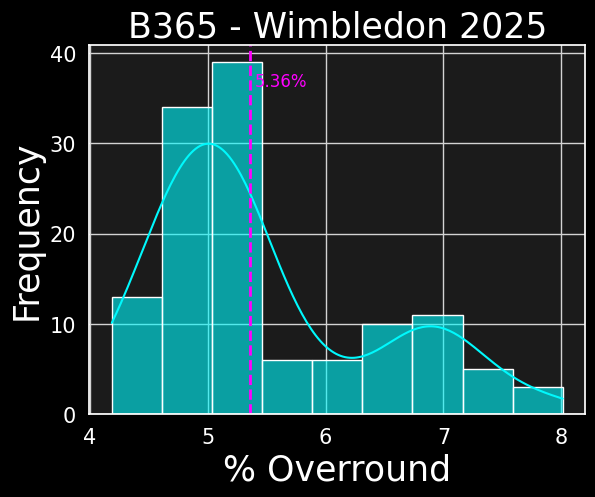

In [26]:
sns.set_theme(style="darkgrid", rc={"axes.labelcolor": "white",
                                    "text.color": "white",
                                    "xtick.color": "white",
                                    "ytick.color": "white",
                                    "axes.facecolor": "#1B1B1B",
                                    "figure.facecolor": "black",
                                    "grid.color": "lightgrey",
                                    "xtick.labelsize": 15,
                                    "ytick.labelsize": 15,
                                    "legend.fontsize": 15 })

# Create a histogram with a KDE
sns.histplot(odds_data['ovr'], color='#00F9FD', alpha=0.6, kde=True)

# Add a vertical dashed line for the mode and annotate it with the value and a '%' sign
mode_vals = odds_data['ovr'].mode()
# Use the first mode if multiple exist, fall back to mean if mode is empty
if len(mode_vals) > 0:
    mode_ovr = mode_vals.iloc[0]
else:
    mode_ovr = odds_data['ovr'].mean()
plt.axvline(mode_ovr, color='magenta', linestyle='--', linewidth=2)
# Compute a small horizontal offset relative to x-range so the text doesn't overlap the line
x_min, x_max = plt.xlim()
x_offset = (x_max - x_min) * 0.01
y_min, y_max = plt.ylim()
plt.text(mode_ovr + x_offset, y_max * 0.9, f"{mode_ovr:.2f}%", color='magenta', fontsize=12, va='center')

# Set the title and labels of the plot
plt.title('B365 - Wimbledon 2025', fontsize=25)
plt.xlabel('% Overround', fontsize=25)
plt.ylabel('Frequency', fontsize=25)

# Show the plot
plt.show()


Print descriptive statistics for the 'ovr' column to summarize central tendency and spread.

In [27]:
odds_data['ovr'].describe()

,ovr
count,127.000000
mean,5.465259
std,0.935840
min,4.186047
25%,4.761905
50%,5.158730
75%,5.918628
max,8.012170


This cell performs a parametric one-sample t-test to check whether the overround percentage (mean) is significantly different from 0.

In [29]:
# Parametric test: one-sample t-test comparing mean overround to 0
from scipy import stats

data = odds_data['ovr'].dropna()
n = data.size
sample_mean = data.mean()
sample_std = data.std(ddof=1)

# Normality check (Shapiro-Wilk) when reasonable
shapiro_stat, shapiro_p = (None, None)
if n <= 5000:
    shapiro_stat, shapiro_p = stats.shapiro(data)

# One-sample t-test vs 0 (two-sided)
t_stat, p_val = stats.ttest_1samp(data, popmean=0.0)

print(f"n={n}")
print(f"mean={sample_mean:.4f}%, std={sample_std:.4f}%")
if shapiro_p is not None:
    print(f"Shapiro-Wilk: stat={shapiro_stat:.4f}, p={shapiro_p:.4g}")
else:
    print("Shapiro-Wilk: skipped (n>5000)")
    print(f"One-sample t-test vs 0: t={t_stat:.4f}, p={p_val:.4g}")
if p_val < 0.05:
    print("Result: Reject H0 at alpha=0.05")
    print("Conclusion: Mean differs from 0.")
else:
    print("Result: Fail to reject H0 at alpha=0.05")
    print("Conclusion: No evidence mean differs from 0.")


n=127
mean=5.4653%, std=0.9358%
Shapiro-Wilk: stat=0.8842, p=1.645e-08
Result: Reject H0 at alpha=0.05
Conclusion: Mean differs from 0.
